In [2]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits import mplot3d
import random
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import preprocessing
import math
from scipy.spatial.distance import euclidean as eu

In [35]:
D_path = glob.glob('Data/Dyslexic' + "/*")
C_path = glob.glob('Data/Control' + "/*")

C_data = []
for path in C_path:
    temp = pd.read_csv(path)
    temp = temp.drop('Unnamed: 0',axis = 1)
    C_data.append(temp)
    
D_data = []
for path in D_path:
    temp = pd.read_csv(path)
    temp = temp.drop('Unnamed: 0',axis = 1)
    D_data.append(temp)

In [36]:
D = [D_data[29], D_data[11],D_data[85],D_data[42],D_data[61]]
C = [C_data[51], C_data[86],C_data[34],C_data[16],C_data[52]]

Dv = [D_data[39], D_data[63],D_data[78],D_data[3],D_data[50]]
Cv = [C_data[39], C_data[63],C_data[12],C_data[5],C_data[46]]


#### different lengths:

C--
1499 39
999 63
1749 12
1249 5
1999 46

D--
1999 18
1999 1
1999 50
1999 80
1999 73

In [37]:
for dd in range(5):
    n=random.randint(0, len(D_data))
    print(len(D_data[n]['T']))
    print(n)

1999
28
1999
88
1999
63
1999
2
1999
8


In [38]:
for dd in range(5):
    n=random.randint(0, len(C_data))
    print(len(C_data[n]['T']))
    print(n)

1999
3
1499
39
1249
27
1499
76
999
58


In [39]:
def new_vals(data):
    x = [sum(x) for x in zip(data['LX'].to_list(), data['RX'].tolist())]
    y = [sum(x) for x in zip(data['LY'].to_list(), data['RY'].tolist())]
    
    compl = np.array([complex(a,b) for a,b in zip(x, y)])
    
    return compl

# Binning:

In [48]:
def binning(bins, fft, overlap_per):
    div_size = len(fft)/bins
    bin_size = div_size*(1+(overlap_per/100))
    half_bin = bin_size/2
    
    binned = []
    
    current_step = bin_size
    for a in range(bins):
        
        pos = np.ceil(half_bin + a*(div_size))
        start = 0 if a == 0 else int(np.ceil(pos - half_bin))
        end = -1 if a == (bins-1) else int(np.ceil(pos + half_bin))
        #print([start, end])
        
        binned = np.append(binned, sum(np.abs(fft[start : end]))) 
        
    return binned
    

In [49]:
def plot_binned_vals(all_buckets):
    fig, axs = plt.subplots(2,5, sharey = True, figsize = (100,20))
    for a in range(len(all_buckets)):
        values = all_buckets[a]
        num = list(range(len(values)))
        axs[int(a/5)][a%5].bar(num, values, width=0.8)
    
    plt.show()

In [82]:
bins = 250
bin_per = 30

## For variable length vectors:
### 1. Normalizing for each: 

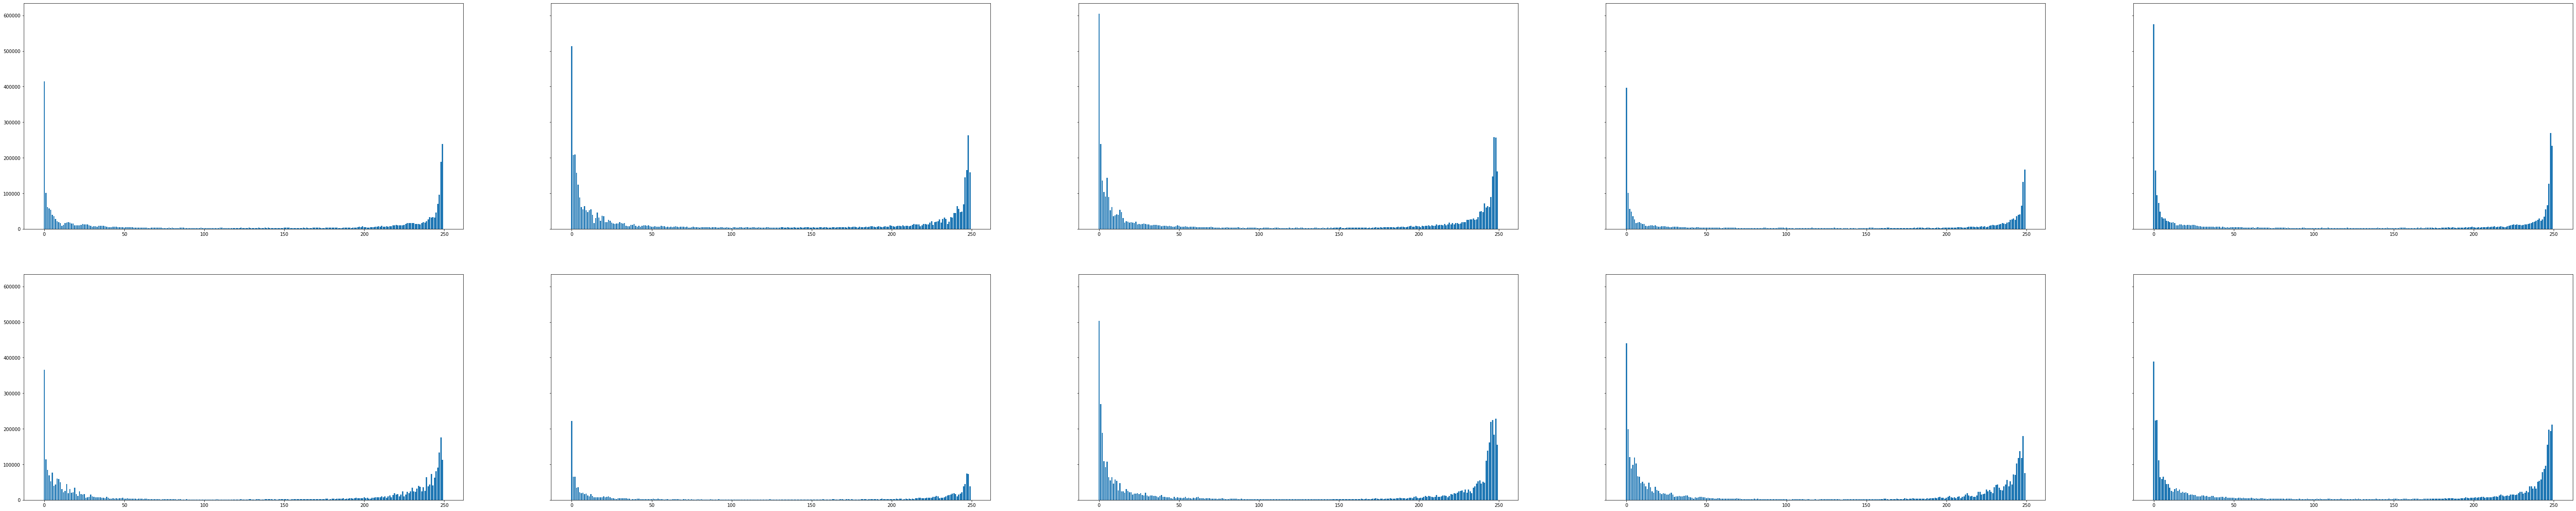

In [83]:
var_len = [Dv,Cv]
all_buckets1 = []
for case in range(2):
    for no in range(5):
        d = new_vals(var_len[case][no])
        fft = np.fft.fft(d)   
        
        all_buckets1.append(binning(bins, fft, bin_per).tolist())
        
        
plot_binned_vals(all_buckets1)

### 2. Normalizing over all:

## For same length Vectors:
### 1. Normalizing for each 

### 2. Normalizing over all 

# Distance Vectors:

In [84]:
def return_sq_im(buckets):    
    matrix = np.empty([10,10])    
    for a in range(10):
        for b in range(10):
            m = buckets[a]
            n = buckets[b]

            dis = eu([m], [n])
            matrix[a][b] = dis 

    mx = np.amax(matrix)
    img = matrix/mx  
    img = img*256
    
    return img

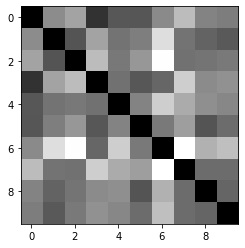

In [85]:
for a in [all_buckets1]:
    img = return_sq_im(a)

    plt.imshow(img, cmap='gray', vmin=0, vmax=256)
    plt.show()

In [86]:
data_sets = [D_data,C_data]
all_buckets1 = []
for dataset in data_sets:
    for no in range(len(dataset)):
        d = new_vals(dataset[no])
        fft = np.fft.fft(d)   
        
        binned = binning(bins, fft, bin_per)
        all_buckets1.append(binned)
        buckets = np.asarray(all_buckets1)


In [87]:
buckets.shape

(186, 250)

In [88]:
kmeans = KMeans(n_clusters = 2, random_state=0).fit(buckets)
predicted_labels = kmeans.labels_

In [89]:
actual_labels = np.concatenate((np.ones(98), np.zeros(88)))

In [90]:
confusion_matrix(actual_labels,predicted_labels)[:2]

array([[68, 20],
       [57, 41]], dtype=int64)

In [91]:
accuracy_score(actual_labels,predicted_labels)*100

58.602150537634415